In [1]:
# import the standard libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,6)



In [2]:
#import the dataset
file = '/home/user/5. machine-learning/linear-regression/CCPP/PowerPlant.xlsx'
df = pd.read_excel(file)

df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
# Extract features and outputs
X = df.iloc[:,1:len(df.columns)]
y = df.iloc[:,-1]
print(X.shape,y.shape)

(9568, 4) (9568,)


In [4]:
# split into test train 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.33, random_state= 49)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(6410, 4) (6410,) (3158, 4) (3158,)


### Apply Lineare Regression using sklearn


In [5]:
model = LinearRegression()

#train the model
model.fit(X=X_train,y=y_train)

LinearRegression()

In [6]:
#get the model parameters
print(f'Intercept (sklearn):{model.intercept_} ')

print(f'Coefficients (sklearn):{model.coef_} ')

Intercept (sklearn):-2.2737367544323206e-13 
Coefficients (sklearn):[-2.17834548e-15  4.44089210e-16  5.55111512e-16  1.00000000e+00] 


In [7]:
# make predictions and calcualte mean absolute error
y_preds = model.predict(X=X_test)

mae = mean_absolute_error(y_true=y_test,y_pred= y_preds)

mse = mean_squared_error(y_true=y_test, y_pred=y_preds)
print(f'Mean absolute error: {mae}')
print(f'Mean squared error: {mse}')

Mean absolute error: 2.687372525623381e-14
Mean squared error: 1.5910310279943275e-27


### Apply LR using self created library


In [8]:
from selfModule import LinearReg
# get the model
mlr = LinearReg()

# train the model
mlr.train_the_model(X_train=X_train, 
                    y_train=y_train, 
                    learning_rate=0.001, 
                    iterations=10,
                    show=True)

Intercept: 
-3.259460594328981e+30
Coefficients: 
[-1.76438528e+32 -3.30320285e+33 -2.39034344e+32 -1.48200641e+33]


### Testing with dataset 2 as did in SLR_scratch file

In [9]:
#import the dataset
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39.343
1,1.3,46.205
2,1.5,37.731
3,2.0,43.525
4,2.2,39.891


In [10]:
#Extract features and output
X = df.iloc[:,1:len(df.columns)]

y = df.iloc[:,-1]

#Scale the X data
from sklearn.preprocessing import minmax_scale

# Apply min-max scaling to the data
#y = pd.DataFrame(minmax_scale(y))

In [11]:
# Split into train test
from sklearn.model_selection import train_test_split

X_train,  X_test,y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)
print(X_train.shape,y_train.shape,X_test.shape, y_test.shape)

(20, 1) (20,) (10, 1) (10,)


### Test with sklearn module

In [12]:
model = LinearRegression()

#train the model
model.fit(X=X,y=y)

LinearRegression()

In [13]:
#get the model parameters
print(f'Intercept (sklearn):{model.intercept_} ')

print(f'Coefficients (sklearn):{model.coef_} ')

Intercept (sklearn):-2.842170943040401e-14 
Coefficients (sklearn):[1.] 


In [14]:
# make predictions and calcualte mean absolute error
y_preds_sklearn = model.predict(X=X)

mae = mean_absolute_error(y_true=y,y_pred= y_preds_sklearn)

mse = mean_squared_error(y_true=y, y_pred=y_preds_sklearn)
print(f'Mean absolute error: {mae}')
print(f'Mean squared error: {mse}')

Mean absolute error: 1.0894988614988204e-14
Mean squared error: 2.1541161785235095e-28


### Try with my module

In [29]:
from selfModule import LinearReg
# call the class to define a model
slr = LinearReg()

#train the model
slr.train_the_model(X,y,
                        learning_rate=0.0001,
                        iterations=10,
                        show=True)


Intercept: 
0.011679333333333333
Coefficients: 
[0.99975388]


In [30]:
# make predictions and calcualte mean absolute error
y_preds = slr.test_the_model(X_test=X)

mae = mean_absolute_error(y_true=y,y_pred= y_preds)

mse = mean_squared_error(y_true=y, y_pred=y_preds)
print(f'Mean absolute error: {mae}')
print(f'Mean squared error: {mse}')

Mean absolute error: 0.23460000000000011
Mean squared error: 0.07480406666666674


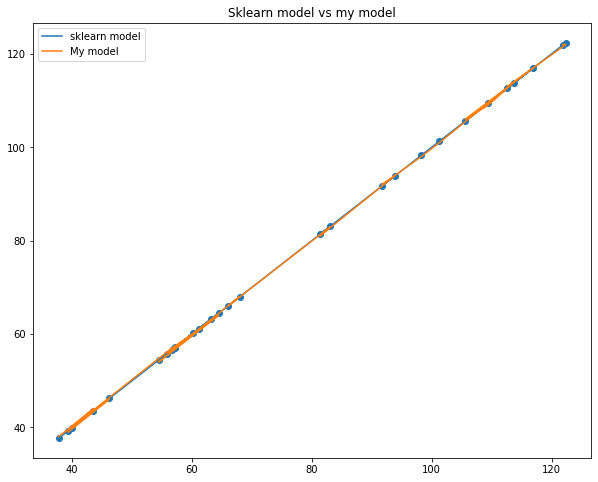

In [27]:
#plot the differences
plt.rcParams['figure.figsize']=(10,8)
plt.scatter(X,y)
plt.plot(X,y_preds_sklearn, label ='sklearn model')
plt.plot(X, y_preds, label = 'My model')
plt.title('Sklearn model vs my model')
plt.legend()

plt.show()

